In [2]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/151.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/151.4 kB ? eta -:--:--
   ---------- ---------------------------- 41.0/151.4 kB 245.8 kB/s eta 0:00:01
   ----------------------- --------------- 92.2/151.4 kB 479.1 kB/s eta 0:00:01
   -------------------------------------- 151.4/151.4 kB 647.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [2]:
%%capture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import pydot

#Text Pre-processing libraries
import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud

#scikit-learn imports to build the model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import joblib

nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('labeled_data.csv')
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
dic = {1:'a',2:'b'}
df = pd.create_(dic)
df

AttributeError: module 'pandas' has no attribute 'dict_to_df'

In [3]:
df = df[["class", "tweet"]]

In [4]:
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
df['labels'] = df['class'].map({0: 'Hate Speech',
                                1: 'Offensive Language',
                                2: 'Niether'})

df.head()

,class,tweet,labels
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,Niether
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language


In [6]:
df.shape

(24783, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   24783 non-null  int64 
 1   tweet   24783 non-null  object
 2   labels  24783 non-null  object
dtypes: int64(1), object(2)
memory usage: 581.0+ KB


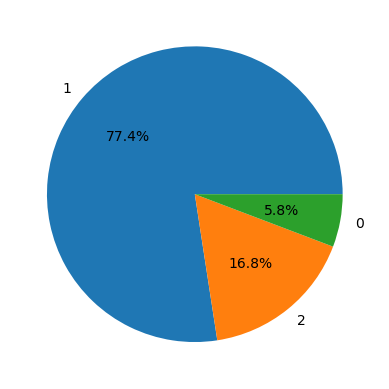

In [8]:
plt.pie(df['class'].value_counts().values,
       labels = df['class'].value_counts().index,
       autopct = '%1.1f%%')
plt.show()

### 0 -  Hate speech
### 1 -  Offensive Language
### 2 -  Neither

In [9]:
#Lower case all the words of the tweet before any preprocessing
df['tweet'] = df['tweet'].str.lower()

#Removing punctuations present in the text
punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('','',punctuations_list)
    return text.translate(temp)

df['tweet'] = df['tweet'].apply(lambda x: remove_punctuations(x))
df.head()

,class,tweet,labels
0,2,rt mayasolovely as a woman you shouldnt compl...,Niether
1,1,rt mleew17 boy dats coldtyga dwn bad for cuff...,Offensive Language
2,1,rt urkindofbrand dawg rt 80sbaby4life you eve...,Offensive Language
3,1,rt cganderson vivabased she look like a tranny,Offensive Language
4,1,rt shenikaroberts the shit you hear about me ...,Offensive Language


In [10]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')
    
    imp_words = []
    
    #storing the important words
    for word in str(text).split():
        
        if word not in stop_words:
            
            #Let's Lemmatize the word as well
            #before appending to the imp_words list.
            
            lemmatizer = WordNetLemmatizer()
            lemmatizer.lemmatize(word)
            
            imp_words.append(word)
            
    output = " ".join(imp_words)
    
    return output

df['tweet'] = df['tweet'].apply(lambda text: remove_stopwords(text))
df.head()

,class,tweet,labels
0,2,rt mayasolovely woman shouldnt complain cleani...,Niether
1,1,rt mleew17 boy dats coldtyga dwn bad cuffin da...,Offensive Language
2,1,rt urkindofbrand dawg rt 80sbaby4life ever fuc...,Offensive Language
3,1,rt cganderson vivabased look like tranny,Offensive Language
4,1,rt shenikaroberts shit hear might true might f...,Offensive Language


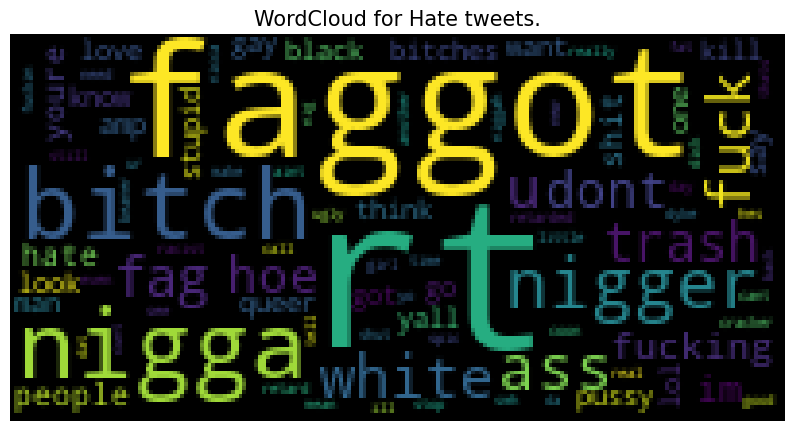

In [11]:
def plot_word_cloud(data,typ):
    #Joining all the tweets to get the corpus
    tweet_corpus = " ".join(data['tweet'])
    
    plt.figure(figsize = (10,10))
    
    #Forming the word cloud
    wc = WordCloud(max_words = 100,
                  width = 200,
                  height = 100,
                  collocations = False).generate(tweet_corpus)
    
    #Plotting the wordcloud obtained above
    plt.title(f"WordCloud for {typ} tweets.",fontsize = 15)
    plt.axis("off")
    plt.imshow(wc)
    plt.show()
    print()
    
plot_word_cloud(df[df['class'] == 0], typ='Hate')

In [12]:
features = np.array(df['tweet'])
target = np.array(df['class'])

cv = CountVectorizer()
F = cv.fit_transform(features)

X_train, X_val, Y_train, Y_val = train_test_split(F,
                                                 target,
                                                 test_size = 0.2,
                                                 random_state = 22)
X_train.shape, X_val.shape

((19826, 40654), (4957, 40654))

In [13]:
Y_train = pd.get_dummies(Y_train)
Y_val = pd.get_dummies(Y_val)
Y_train.shape, Y_val.shape

((19826, 3), (4957, 3))

In [14]:
clf = DecisionTreeClassifier()
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [15]:
joblib.dump(clf, 'Hate_Speech_Dectection')

['Hate_Speech_Dectection']

In [16]:
def res(result):
    for i in range(0,3):
        if result[0][i] == True:
            if i == 0:
                return "Hate speech"
            elif i == 1:
                return "Offensive Language"
            else:
                return "Niether"

In [17]:
loaded_model = joblib.load('Hate_Speech_Dectection')

In [18]:
#Testing the model
sample = "11,3,0,3,0,1,Let's unite and kill all the people who are protesting against the government"
data = cv.transform([sample]).toarray()
result = loaded_model.predict(data)
print(res(result))

Hate speech


In [19]:
# Make predictions on the test set
y_pred = clf.predict(X_val)

from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(Y_val, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 88.64%
